### Jambo Exploratory Analysis

* Just looking for patterns here.
* Data sourced from current POS system from opening date of the shop. Will try to update it regularly

An overview of the raw data

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

from keys import conn_str
from sqlalchemy import create_engine, exc

df = pd.read_sql_table('raw_sales', conn_str)
df.tail()

,index,Outlet,Number,Date,DueDate,SalesType,SalesPerson,Customer,CreatorID,Created,...,Variants.Cost,Variants.UnitQuantity,Variants.Quantity,Variants.Code,Variants.Name,Payments.Note,Payments.Code,Payments.Method,Payments.Amount,Payments.Date
13488,2750,Kayole Branch,21.01.513,2021-01-25T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2021-01-25T22:22:41.243,...,104.0,1.0,1.0,None,Velvet 4,None,None,Cash,130.0,2021-01-25T00:00:00
13489,2750,Kayole Branch,21.01.513,2021-01-25T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2021-01-25T22:22:41.243,...,17.0,1.0,1.0,None,Cotton Tops,None,None,Cash,130.0,2021-01-25T00:00:00
13490,2751,Kayole Branch,21.01.514,2021-01-25T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2021-01-25T22:33:50.673,...,150.0,1.0,1.0,None,pallazo pants 5,None,None,Cash,100.0,2021-01-25T00:00:00
13491,2752,Kayole Branch,21.01.515,2021-01-25T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2021-01-26T00:04:36.673,...,150.0,1.0,1.0,None,pallazo pants 5,None,None,Cash,190.0,2021-01-25T00:00:00
13492,2752,Kayole Branch,21.01.515,2021-01-25T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2021-01-26T00:04:36.673,...,104.0,1.0,1.0,None,Velvet 4,None,None,Cash,190.0,2021-01-25T00:00:00


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13493 entries, 0 to 13492
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    13493 non-null  int64  
 1   Outlet                   13493 non-null  object 
 2   Number                   13493 non-null  object 
 3   Date                     13493 non-null  object 
 4   DueDate                  13493 non-null  object 
 5   SalesType                13493 non-null  object 
 6   SalesPerson              0 non-null      object 
 7   Customer                 0 non-null      float64
 8   CreatorID                13493 non-null  object 
 9   Created                  13493 non-null  object 
 10  Discount1                13493 non-null  float64
 11  Discount2                13493 non-null  float64
 12  DiscountAmount           13493 non-null  float64
 13  Gross                    13493 non-null  float64
 14  DiscountTotal         

In [3]:
df.nunique()

index                      2759
Outlet                        1
Number                     9267
Date                        306
DueDate                       1
SalesType                     1
SalesPerson                   0
Customer                      0
CreatorID                     1
Created                    9264
Discount1                     3
Discount2                     3
DiscountAmount               21
Gross                       394
DiscountTotal                73
TaxType                       1
Tax                           1
Surcharge                     1
Sales                       420
SalesNTax                   420
Coupon                        0
Note                         14
InvoiceID                  9267
PointUsed                     1
PointsEarned                 32
Delivery                      2
Void                          1
Customer.Name                51
Customer.Email                0
Customer.Mobile              47
Customer.Code                37
Variants

Converting the 'Created' column to datetime and sorting the entries from oldest to newest.
Will be useful in the future

In [4]:
df['Created'] = pd.to_datetime(df['Created'])
df = df.set_index('Created')

df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['dayOfWeek'] = df.index.weekday
df['weekOfMonth'] = df.index.week
df['hour'] = df.index.hour
df['minute'] = df.index.minute
df.head()

<ipython-input-4-8f5b712e4282>:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekOfMonth'] = df.index.week


,index,Outlet,Number,Date,DueDate,SalesType,SalesPerson,Customer,CreatorID,Discount1,...,Payments.Method,Payments.Amount,Payments.Date,year,month,day,dayOfWeek,weekOfMonth,hour,minute
Created,,,,,,,,,,,,,,,,,,,,,
2020-02-07 22:51:30.473,0,Kayole Branch,20.02.002,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,0.0,...,Cash,200.0,2020-02-07T00:00:00,2020,2,7,4,6,22,51
2020-02-07 22:52:50.140,1,Kayole Branch,20.02.003,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,0.0,...,Cash,400.0,2020-02-07T00:00:00,2020,2,7,4,6,22,52
2020-02-07 22:53:26.450,2,Kayole Branch,20.02.004,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,0.0,...,Cash,100.0,2020-02-07T00:00:00,2020,2,7,4,6,22,53
2020-02-07 23:05:02.100,3,Kayole Branch,20.02.005,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,0.0,...,Cash,380.0,2020-02-07T00:00:00,2020,2,7,4,6,23,5
2020-02-07 23:05:02.100,3,Kayole Branch,20.02.005,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,0.0,...,Cash,380.0,2020-02-07T00:00:00,2020,2,7,4,6,23,5


In [5]:
df['hour'] = df.hour - 5


In [6]:
df['Date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])
df.Date.head()

Created
2020-02-07 22:51:30.473   2020-02-07 17:51:00
2020-02-07 22:52:50.140   2020-02-07 17:52:00
2020-02-07 22:53:26.450   2020-02-07 17:53:00
2020-02-07 23:05:02.100   2020-02-07 18:05:00
2020-02-07 23:05:02.100   2020-02-07 18:05:00
Name: Date, dtype: datetime64[ns]

In [7]:
df = df.reset_index()
df

,Created,index,Outlet,Number,Date,DueDate,SalesType,SalesPerson,Customer,CreatorID,...,Payments.Method,Payments.Amount,Payments.Date,year,month,day,dayOfWeek,weekOfMonth,hour,minute
0,2020-02-07 22:51:30.473,0,Kayole Branch,20.02.002,2020-02-07 17:51:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,...,Cash,200.0,2020-02-07T00:00:00,2020,2,7,4,6,17,51
1,2020-02-07 22:52:50.140,1,Kayole Branch,20.02.003,2020-02-07 17:52:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,...,Cash,400.0,2020-02-07T00:00:00,2020,2,7,4,6,17,52
2,2020-02-07 22:53:26.450,2,Kayole Branch,20.02.004,2020-02-07 17:53:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,...,Cash,100.0,2020-02-07T00:00:00,2020,2,7,4,6,17,53
3,2020-02-07 23:05:02.100,3,Kayole Branch,20.02.005,2020-02-07 18:05:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,...,Cash,380.0,2020-02-07T00:00:00,2020,2,7,4,6,18,5
4,2020-02-07 23:05:02.100,3,Kayole Branch,20.02.005,2020-02-07 18:05:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,...,Cash,380.0,2020-02-07T00:00:00,2020,2,7,4,6,18,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13488,2021-01-25 22:22:41.243,2750,Kayole Branch,21.01.513,2021-01-25 17:22:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,...,Cash,130.0,2021-01-25T00:00:00,2021,1,25,0,4,17,22
13489,2021-01-25 22:22:41.243,2750,Kayole Branch,21.01.513,2021-01-25 17:22:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,...,Cash,130.0,2021-01-25T00:00:00,2021,1,25,0,4,17,22
13490,2021-01-25 22:33:50.673,2751,Kayole Branch,21.01.514,2021-01-25 17:33:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,...,Cash,100.0,2021-01-25T00:00:00,2021,1,25,0,4,17,33
13491,2021-01-26 00:04:36.673,2752,Kayole Branch,21.01.515,2021-01-25 19:04:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,...,Cash,190.0,2021-01-25T00:00:00,2021,1,26,1,4,-5,4


In [8]:
'''to get the time of the most recently updated entry to the records'''
print(df['Date'].iloc[0])

2020-02-07 17:51:00


Checking for the unique values per column. This will determine which columns to drop as we clean up the data

In [9]:
df.nunique()

Created                    9264
index                      2759
Outlet                        1
Number                     9267
Date                        306
DueDate                       1
SalesType                     1
SalesPerson                   0
Customer                      0
CreatorID                     1
Discount1                     3
Discount2                     3
DiscountAmount               21
Gross                       394
DiscountTotal                73
TaxType                       1
Tax                           1
Surcharge                     1
Sales                       420
SalesNTax                   420
Coupon                        0
Note                         14
InvoiceID                  9267
PointUsed                     1
PointsEarned                 32
Delivery                      2
Void                          1
Customer.Name                51
Customer.Email                0
Customer.Mobile              47
Customer.Code                37
Variants

Dropping the columns with only one unique value in them. These won't help us in the analysis as they are consistent

In [9]:
df = df.drop(['Outlet', 'DueDate', 'SalesType', 'SalesPerson', 'CreatorID', 'Discount1', 'Discount2',
              'DiscountAmount', 'DiscountTotal', 'TaxType', 'Tax', 'Surcharge', 'Sales', 'Coupon', 'Note',
              'Delivery', 'Void', 'SalesNTax', 'PointUsed', 'Outlet', 'Customer.Name', 'Customer.Mobile',
              'Customer.Code', 'Variants.Note', 'Variants.PriceTypeID', 'Variants.Expense', 'Variants.LoyaltyPoint',
              'Variants.Taxable', 'Variants.UnitQuantity', 'Customer', 'Customer.Email'], axis=1)

Checking for columns with Nan Values and dropping them

In [10]:
df.isna()


,Created,index,Number,Date,Gross,InvoiceID,PointsEarned,Variants.NettPrice,Variants.DiscountAmount,Variants.Discount,...,Payments.Method,Payments.Amount,Payments.Date,year,month,day,dayOfWeek,weekOfMonth,hour,minute
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13488,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13489,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13490,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13491,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.dropna(inplace=True, axis=1, how='all')
df.head()


,Created,index,Number,Date,Gross,InvoiceID,PointsEarned,Variants.NettPrice,Variants.DiscountAmount,Variants.Discount,...,Payments.Method,Payments.Amount,Payments.Date,year,month,day,dayOfWeek,weekOfMonth,hour,minute
0,2020-02-07 22:51:30.473,0,20.02.002,2020-02-07 17:51:00,200.0,a4f938d7-a234-49f9-9588-ea6dc1b547b2,0.0,200.0,0.0,0.0,...,Cash,200.0,2020-02-07T00:00:00,2020,2,7,4,6,17,51
1,2020-02-07 22:52:50.140,1,20.02.003,2020-02-07 17:52:00,400.0,89681b1f-21ab-4f0a-8780-3971de3f82b0,0.0,400.0,0.0,0.0,...,Cash,400.0,2020-02-07T00:00:00,2020,2,7,4,6,17,52
2,2020-02-07 22:53:26.450,2,20.02.004,2020-02-07 17:53:00,100.0,af594745-e964-4051-ae17-93b23b746743,0.0,100.0,0.0,0.0,...,Cash,100.0,2020-02-07T00:00:00,2020,2,7,4,6,17,53
3,2020-02-07 23:05:02.100,3,20.02.005,2020-02-07 18:05:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,80.0,0.0,0.0,...,Cash,380.0,2020-02-07T00:00:00,2020,2,7,4,6,18,5
4,2020-02-07 23:05:02.100,3,20.02.005,2020-02-07 18:05:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,300.0,0.0,0.0,...,Cash,380.0,2020-02-07T00:00:00,2020,2,7,4,6,18,5


In [12]:
df.nunique()

Created                    9264
index                      2759
Number                     9267
Date                       8832
Gross                       394
InvoiceID                  9267
PointsEarned                 32
Variants.NettPrice          249
Variants.DiscountAmount       7
Variants.Discount             5
Variants.PriceOriginal       85
Variants.Price              115
Variants.Cost               157
Variants.Quantity            31
Variants.Code                 8
Variants.Name               260
Payments.Note               299
Payments.Code                30
Payments.Method               2
Payments.Amount             420
Payments.Date               307
year                          2
month                        12
day                          31
dayOfWeek                     7
weekOfMonth                  51
hour                         13
minute                       60
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13493 entries, 0 to 13492
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Created                  13493 non-null  datetime64[ns]
 1   index                    13493 non-null  int64         
 2   Number                   13493 non-null  object        
 3   Date                     13493 non-null  datetime64[ns]
 4   Gross                    13493 non-null  float64       
 5   InvoiceID                13493 non-null  object        
 6   PointsEarned             13493 non-null  float64       
 7   Variants.NettPrice       13493 non-null  float64       
 8   Variants.DiscountAmount  13493 non-null  float64       
 9   Variants.Discount        13493 non-null  float64       
 10  Variants.PriceOriginal   13493 non-null  float64       
 11  Variants.Price           13493 non-null  float64       
 12  Variants.Cost            13493 n

In [14]:
# Units sold

df_units = df.groupby(by="Variants.Name")['Variants.Quantity'].sum().reset_index()
df_units.sort_values(by="Variants.Quantity", ascending=False, inplace=True)
df_units

,Variants.Name,Variants.Quantity
99,Fagia,1258.0
257,socks,804.0
40,Chiffon Tops Long Sleeve,655.0
206,Stockings,570.0
172,Newborns,481.0
...,...,...
135,LED HD tv,1.0
133,Kids Bike FMK,1.0
213,Synix Smart TV 43 inch,1.0
214,Toddler Shoes 650,1.0


In [16]:
'''total sales'''
df['Gross'].sum()

5714812.0

In [19]:
'''previous day sales'''
daily_sales = df.groupby(by='Date')["Gross"].sum().reset_index()
new_sales_pc = round(((daily_sales.iloc[-1]['Gross'] - daily_sales.iloc[-2]['Gross']) / daily_sales.iloc[-1]['Gross'])*100, 2)
new_sales_pc

73.68

In [22]:
'''the day's best selling item'''
day_best_seller = df.groupby(["Date", "Variants.Name"])['Variants.Quantity'].sum().reset_index().rename(columns={0:'count'})
last_sell_date = day_best_seller.iloc[-1]['Date']
day_best_seller = day_best_seller.loc[(day_best_seller['Date']==last_sell_date)]
day_best_seller.sort_values(by="Variants.Quantity", ascending=False, inplace=True)
day_best_seller.iloc[0]['Variants.Quantity']

1.0

In [23]:
pr_var = df['Variants.Name'].value_counts()
pr_var[pr_var > 1]

Fagia                            508
Chiffon Tops Long Sleeve         404
socks                            353
Stockings                        319
pallazo pants                    270
                                ... 
Baby Shawl Heavy                   2
Baby Toy jigglers traditional      2
Skating shoes 36                   2
Baby Sheets 200                    2
Children Set Dresses               2
Name: Variants.Name, Length: 216, dtype: int64

In [24]:
# more units sold analysis
pr_unit = df['Variants.Quantity'].value_counts()
pr_unit

 1.0     9620
 2.0     2295
 3.0      756
 4.0      323
 5.0      161
 6.0      110
 7.0       49
 8.0       36
 9.0       22
 10.0      21
 12.0      15
 11.0      12
-1.0       12
 15.0      11
 14.0       9
 16.0       7
 13.0       6
-2.0        5
 17.0       5
 19.0       3
-3.0        2
 40.0       2
 18.0       2
 55.0       2
-4.0        1
 28.0       1
 46.0       1
 42.0       1
 25.0       1
 32.0       1
 37.0       1
Name: Variants.Quantity, dtype: int64

In [25]:
'''calculating the number of units sold in current day'''
units_sold = df.groupby(["Date"])["Variants.Quantity"].sum().reset_index()
units_sold_today = units_sold.iloc[-1]['Variants.Quantity']

2.0

In [22]:
'''day that a product was first sold'''
first_date_sold = df.groupby(['Variants.Name'])["Date"].max().reset_index()
first_date_sold.sort_values(by="Date", ascending=False, inplace=True)

# test
var = "Chiffon Tops 3"
first_date_sold[first_date_sold['Variants.Name']==var]["Date"]

39    2021-01-25T00:00:00
Name: Date, dtype: object

In [23]:
per_item_quantity = df.groupby(['Date', 'Variants.Name'])['Variants.Quantity'].size().reset_index()
per_item_quantity[per_item_quantity['Variants.Name']=="Bra"].iloc[-1]

Date                 2021-01-05T00:00:00
Variants.Name                        Bra
Variants.Quantity                      1
Name: 6107, dtype: object

In [24]:
'''calculating some total metrics per product'''
products = df.groupby(['Variants.Name'])['Variants.Cost', 'Gross', 'Variants.Quantity'].sum().reset_index()
products.sort_values(['Variants.Quantity'], ascending=False, inplace=True)
products

<ipython-input-24-7dee197b4b1e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  products = df.groupby(['Variants.Name'])['Variants.Cost', 'Gross', 'Variants.Quantity'].sum().reset_index()


,Variants.Name,Variants.Cost,Gross,Variants.Quantity
99,Fagia,0.0,72505.0,1258.0
257,socks,4942.0,109788.0,804.0
40,Chiffon Tops Long Sleeve,21731.0,125350.0,655.0
206,Stockings,2871.0,46840.0,570.0
172,Newborns,3944.0,53075.0,481.0
...,...,...,...,...
135,LED HD tv,2800.0,3000.0,1.0
133,Kids Bike FMK,3200.0,2250.0,1.0
213,Synix Smart TV 43 inch,26500.0,26000.0,1.0
214,Toddler Shoes 650,320.0,400.0,1.0


In [27]:
'''product sales over the last x days'''
product_daily_sales = df.groupby(['Date', 'Variants.Name'])['Variants.Quantity'].size().reset_index()
product_daily_sales[product_daily_sales['Variants.Name']== 'Adult Hoodies Jumper']['Date'].tail(30)
product_daily_sales[product_daily_sales['Variants.Name']== 'Adult Hoodies Jumper']['Variants.Quantity'].tail(30)


0       1
10      3
22      2
40      1
53      2
67      1
81      1
102     1
114     1
161     1
180     5
204     1
224     7
247     2
262     1
282     1
424     2
535     1
585     3
600     1
661     1
696     1
1185    1
1285    3
1329    1
Name: Variants.Quantity, dtype: int64

In [20]:
# Creating product tags from the variant names

df['Tag1'] = (np.where(df['Variants.Name'].str.contains(' '),
                  df['Variants.Name'].str.split(' ').str[0],
                  df['Variants.Name']))

df['Tag2'] = (np.where(df['Variants.Name'].str.contains(' '),
                  df['Variants.Name'].str.split(' ').str[1],
                  df['Variants.Name']))

df['Tag3'] = (np.where(df['Variants.Name'].str.contains(' '),
                  df['Variants.Name'].str.split(' ').str[2],
                  df['Variants.Name']))

df['Tag4'] = (np.where(df['Variants.Name'].str.contains(' '),
                  df['Variants.Name'].str.split(' ').str[3],
                  df['Variants.Name']))

# df['Tag1']= df['Variants.Name'].apply(lambda x: x.split(' ')[0] if x.find(' ')!=-1 else x )
# df['Tag2']= df['Variants.Name'].apply(lambda x: x.split(' ')[1] if x.find(' ')!=-1 else x )

In [21]:
df['Tag1'] = df['Tag1'].replace('Lady', 'Ladies')
df['Tag1'] = df['Tag1'].replace('Women', 'Ladies')
df['Tag1'] = df['Tag1'].replace('WOMEN', 'Ladies')
df['Tag1'] = df['Tag1'].replace('MEN', 'Men')
df['Tag1'] = df['Tag1'].replace('men', 'Men')

df['Tag2'] = df['Tag2'].replace('Lady', 'Ladies')
df['Tag2'] = df['Tag2'].replace('Women', 'Ladies')
df['Tag2'] = df['Tag2'].replace('WOMEN', 'Ladies')
df['Tag2'] = df['Tag2'].replace('MEN', 'Men')
df['Tag2'] = df['Tag2'].replace('men', 'Men')

df['Tag3'] = df['Tag3'].replace('Lady', 'Ladies')
df['Tag3'] = df['Tag3'].replace('Women', 'Ladies')
df['Tag3'] = df['Tag3'].replace('WOMEN', 'Ladies')
df['Tag3'] = df['Tag3'].replace('MEN', 'Men')
df['Tag3'] = df['Tag3'].replace('men', 'Men')

df['Tag3'] = df['Tag3'].replace('Lady', 'Ladies')
df['Tag3'] = df['Tag3'].replace('Women', 'Ladies')
df['Tag3'] = df['Tag3'].replace('WOMEN', 'Ladies')
df['Tag3'] = df['Tag3'].replace('MEN', 'Men')
df['Tag3'] = df['Tag3'].replace('men', 'Men')

df['Tag1']= df.Tag1.str.capitalize()
df['Tag2']= df.Tag2.str.capitalize()
df['Tag3']= df.Tag3.str.capitalize()
df['Tag3']= df.Tag4.str.capitalize()

tags1_list = df.Tag1.value_counts().reset_index()
tags2_list = df.Tag2.value_counts().reset_index()
tags3_list = df.Tag3.value_counts().reset_index()
tags4_list = df.Tag4.value_counts().reset_index()


## Best month for sales?

Text(0, 0.5, 'Revenue')

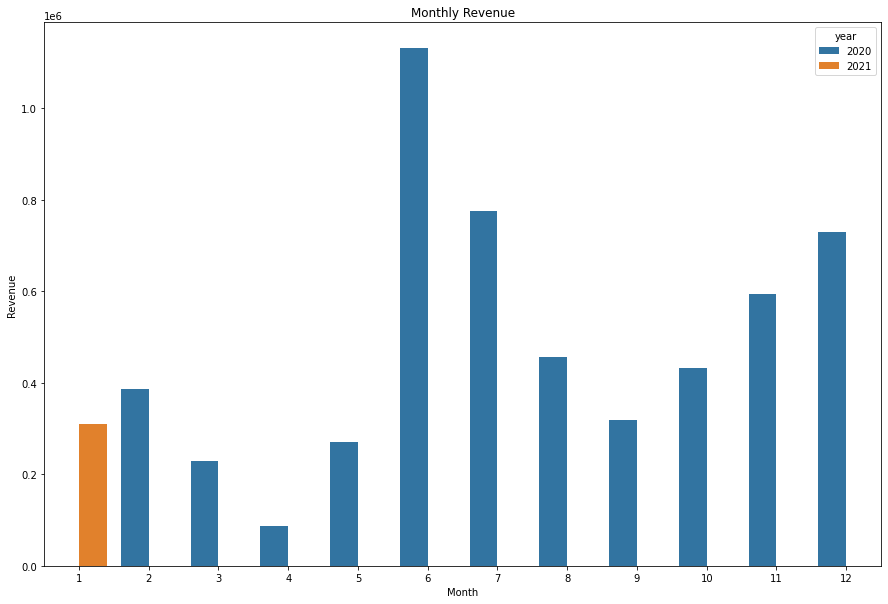

In [22]:
df_revenue = df.groupby(['month', 'year'])['Gross'].sum().reset_index()

plt.figure(figsize=(15,10))
sns.barplot(x="month", y="Gross", hue="year", data=df_revenue)
plt.title('Monthly Revenue')
plt.xlabel("Month")
plt.ylabel("Revenue")


## Best time of the day for sales

In [23]:
df['Count'] = 1
df.head()

,Created,index,Number,Date,Gross,InvoiceID,PointsEarned,Variants.NettPrice,Variants.DiscountAmount,Variants.Discount,...,day,dayOfWeek,weekOfMonth,hour,minute,Tag1,Tag2,Tag3,Tag4,Count
0,2020-02-07 22:51:30.473,0,20.02.002,2020-02-07 17:51:00,200.0,a4f938d7-a234-49f9-9588-ea6dc1b547b2,0.0,200.0,0.0,0.0,...,7,4,6,17,51,Ladies,Dress,2001,2001,1
1,2020-02-07 22:52:50.140,1,20.02.003,2020-02-07 17:52:00,400.0,89681b1f-21ab-4f0a-8780-3971de3f82b0,0.0,400.0,0.0,0.0,...,7,4,6,17,52,Men,Trousers,NaN,NaN,1
2,2020-02-07 22:53:26.450,2,20.02.004,2020-02-07 17:53:00,100.0,af594745-e964-4051-ae17-93b23b746743,0.0,100.0,0.0,0.0,...,7,4,6,17,53,Men,Tshirts,NaN,NaN,1
3,2020-02-07 23:05:02.100,3,20.02.005,2020-02-07 18:05:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,80.0,0.0,0.0,...,7,4,6,18,5,Children,Jackets,3003,3003,1
4,2020-02-07 23:05:02.100,3,20.02.005,2020-02-07 18:05:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,300.0,0.0,0.0,...,7,4,6,18,5,Ladies,Hand,NaN,NaN,1


In [24]:
df.groupby(['hour']).count()['Count']

hour
-5      356
-4        6
 8        5
 9      121
 10     574
 11    1020
 12    1412
 13    1553
 14    1478
 15    1524
 16    1894
 17    1875
 18    1675
Name: Count, dtype: int64

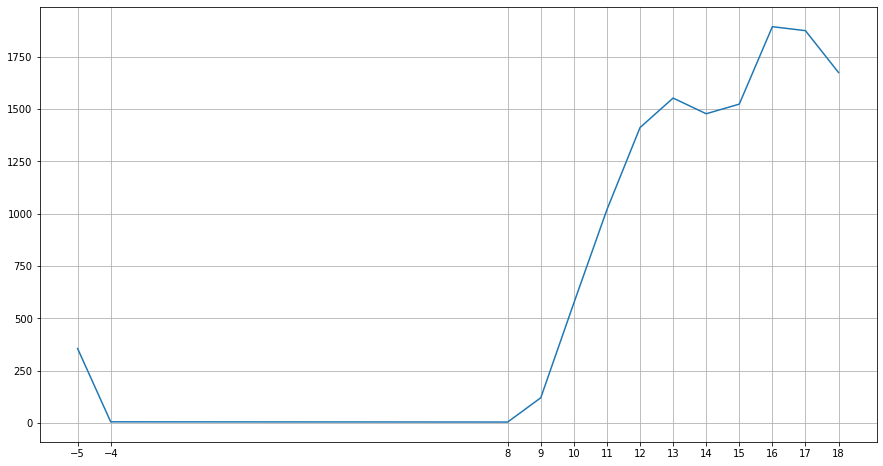

In [25]:
keys = [pair for pair, df in df.groupby(['hour'])]
plt.figure(figsize=(15,8))
plt.plot(keys, df.groupby(['hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

In [26]:
test = df.loc[(df['hour'] < 0)]
test

,Created,index,Number,Date,Gross,InvoiceID,PointsEarned,Variants.NettPrice,Variants.DiscountAmount,Variants.Discount,...,day,dayOfWeek,weekOfMonth,hour,minute,Tag1,Tag2,Tag3,Tag4,Count
9,2020-02-08 00:05:05.727,7,20.02.009,2020-02-07 19:05:00,200.0,e0421c3e-7a48-4db1-80ee-d4f848e9839b,0.0,100.0,0.0,0.0,...,8,5,6,-5,5,Men,Tshirts,NaN,NaN,1
10,2020-02-08 00:05:05.727,7,20.02.009,2020-02-07 19:05:00,200.0,e0421c3e-7a48-4db1-80ee-d4f848e9839b,0.0,100.0,0.0,0.0,...,8,5,6,-5,5,Chiffon,Tops,Sleeve,Sleeve,1
73,2020-02-10 00:02:45.490,46,20.02.048,2020-02-09 19:02:00,200.0,763ad848-131f-4bab-b8db-3d85aa3d469a,0.0,200.0,0.0,0.0,...,10,0,7,-5,2,Ladies,Dress,2001,2001,1
74,2020-02-10 00:06:12.123,47,20.02.049,2020-02-09 19:06:00,199.0,63adf81b-4109-48b6-b35f-d0b1f1011c11,0.0,199.0,0.0,0.0,...,10,0,7,-5,6,Men,Trousers,NaN,NaN,1
75,2020-02-10 00:07:45.593,48,20.02.050,2020-02-09 19:07:00,200.0,228aa368-94a2-48a6-92f5-45a0789ae2e4,0.0,200.0,0.0,0.0,...,10,0,7,-5,7,Ladies,Ladies,Tights,tights,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13458,2021-01-24 00:11:55.060,2735,21.01.498,2021-01-23 19:11:00,90.0,1bd6f9f9-b829-4b98-bdaa-6c63a3844c2f,0.0,90.0,0.0,0.0,...,24,6,3,-5,11,Medium,Children,NaN,NaN,1
13459,2021-01-24 00:24:48.170,2736,21.01.499,2021-01-23 19:24:00,420.0,81a07b7e-4427-4344-bd92-cc2e342168dc,0.0,200.0,0.0,0.0,...,24,6,3,-5,24,Jumpsuits,3,NaN,NaN,1
13460,2021-01-24 00:24:48.170,2736,21.01.499,2021-01-23 19:24:00,420.0,81a07b7e-4427-4344-bd92-cc2e342168dc,0.0,220.0,0.0,0.0,...,24,6,3,-5,24,Pallazo,Pants,NaN,NaN,1
13491,2021-01-26 00:04:36.673,2752,21.01.515,2021-01-25 19:04:00,190.0,5f82a83d-5547-4d20-9b5f-54f1d3b77493,0.0,110.0,0.0,0.0,...,26,1,4,-5,4,Pallazo,Pants,NaN,NaN,1


## Best-selling items

In [ ]:
product_group = df.groupby('Variants.Name')
product_group.sum()

In [ ]:
quantity_sold = product_group.sum().sort_values(by='Variants.Quantity', ascending=False)[['Variants.Quantity', 'Variants.NettPrice']]
quantity_sold

In [ ]:
quantity_sold['Avg.Item.Price'] = quantity_sold['Variants.NettPrice'] / quantity_sold['Variants.Quantity']
quantity_sold['Avg.Item.Price'] = quantity_sold['Avg.Item.Price'].round()
quantity_sold

In [ ]:
products = [product for product, df in product_group]
top_products = quantity_sold.index[:20]
top_quantity = quantity_sold.iloc[:20]['Variants.Quantity']
plt.bar(top_products, top_quantity)
plt.xticks(top_products, rotation='vertical', size=8)
plt.show

In [ ]:
prices = df.groupby('Variants.Name').mean()['Variants.NettPrice'].iloc[0:20]
prices

This is a list of the top 20 most sold items at the store

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(top_products, top_quantity)
ax2.plot(top_products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price in KES', color='b')
ax1.set_xticklabels(top_products, rotation='vertical', size=8)

fig.show()

## What items are sold together?

In [ ]:
df_dup = df[df['Number'].duplicated(keep=False)]
df_dup.head()

In [ ]:
df_dup['Items.Grouped'] = df_dup.groupby('Number')['Variants.Name'].transform(lambda x: ', '.join(x))
df_dup.head()

In [ ]:
df_dup = df_dup[['Number', 'Items.Grouped']].drop_duplicates()
df_dup.head()

In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_dup['Items.Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

grp_count = count.most_common(10)

This is a list of the most popular combination of items sold at the store

In [ ]:
df_grp = pd.DataFrame(grp_count)
df_grp.columns = ['combination', 'count']
df_grp

## Monthly items sold overview

In [ ]:
df_quantity = df.groupby(['month', 'year'])['Variants.Quantity'].sum().reset_index()

plt.figure(figsize=(15,10))
sns.barplot(x="month", y="Variants.Quantity", hue="year", data=df_quantity)
plt.title('Monthly Items Sold')
plt.xlabel("Month")
plt.ylabel("Quantity")

## Average Monthly Revenue

In [ ]:
df_revenue_avg = df.groupby(['month', 'year'])['Gross'].mean().reset_index()

plt.figure(figsize=(15,10))
sns.barplot(x="month", y="Gross", hue="year", data=df_revenue_avg)
plt.title('Monthly Average Revenue')
plt.xlabel("Month")
plt.ylabel("Revenue")

## Frequently sold items

This is a calculation of the frequency of purchased items at the store.

In [ ]:
df_last_purchased = df.groupby(['Variants.Name'])['Created'].max().reset_index()
df_last_purchased.columns = ["Product", "LastPurchaseDate"]
df_last_purchased['Recency'] = (df_last_purchased["LastPurchaseDate"].max() - df_last_purchased['LastPurchaseDate']).dt.days
df_last_purchased = df_last_purchased.sort_values(by=["Recency"], ascending=True)
df_last_purchased

In [ ]:
df_hourly = df.resample('H', on='Created').agg({'Gross': 'sum', 'Variants.Quantity': 'sum', 'Variants.Name': 'nunique'})

In [ ]:
hourly_sales = df.groupby([pd.Grouper(key='Created', freq='H'), 'Variants.Name']).agg(
                                                                       total_quantity=('Variants.Quantity', 'sum'),
                                                                       total_amount=('Variants.NettPrice', 'sum'))
hourly_sales

In [ ]:
daily_sales = df.groupby([pd.Grouper(key='Created', freq='d'), 'Variants.Name']).agg(
                                                                       total_quantity=('Variants.Quantity', 'sum'),
                                                                       total_amount=('Variants.NettPrice', 'sum'))
daily_sales

In [ ]:
weekly_sales = df.groupby([pd.Grouper(key='Created', freq='W'), 'Variants.Name']).agg(
                                                                       total_quantity=('Variants.Quantity', 'sum'),
                                                                       total_amount=('Variants.NettPrice', 'sum'))

weekly_sales

In [ ]:
# Frequency of items bought in terms of days
df_daily = df.groupby(['Variants.Name'])['day'].count().reset_index()
df_daily.columns = ["Product", "Frequency"]
df_daily

In [ ]:
df_last_purchased = pd.merge(df_last_purchased, df_daily, how="inner", on=["Product"])
df_last_purchased

In [ ]:
df_last_purchased['LastPurchaseDate'] = pd.to_datetime(df_last_purchased['LastPurchaseDate'])
df_last_purchased = df_last_purchased.set_index('LastPurchaseDate')

df_last_purchased['LastPurYear'] = df_last_purchased.index.year
df_last_purchased['LastPurMonth'] = df_last_purchased.index.month
df_last_purchased['LastPurDay'] = df_last_purchased.index.day
df_last_purchased['weekDayOfLastPur'] = df_last_purchased.index.weekday
df_last_purchased['yearWeekOfLastPur'] = df_last_purchased.index.week
df_last_purchased['LastPurHour'] = df_last_purchased.index.hour
df_last_purchased['LastPurMinute'] = df_last_purchased.index.minute
df_last_purchased.head()

In [ ]:
df_last_purchased = df_last_purchased.reset_index()
df_last_purchased.rename(columns={"Product": "Variants.Name"}, inplace=True)
df_last_purchased

In [ ]:
df = pd.merge(df, df_last_purchased, how="inner", on=["Variants.Name"])
df.sort_values(by=["Number"], inplace=True)
df.head()

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df_last_purchased['Recency'])
plt.title("Item Frequency Distribution")
plt.xlabel("Recency in days")
plt.ylabel("Item sale count")

In [ ]:
# finding the interval between item purchases in minutes

df['ItemTimeDiff'] = df.loc[:,'Created'].diff().dt.total_seconds()
df['ItemTimeDiff']

In [ ]:
# finding the time interval between sale of a particular product in minutes. Please note that the interval is in minutes

df['ProductTimeDiff'] = df.groupby(by="Variants.Name")['Created'].diff().dt.total_seconds()
df['ProductTimeDiff']

In [21]:
'''Calculating profit/loss, margins and deviations from desired margin of 1'''

df['GrossMargin'] = df['Variants.Price'] - df['Variants.Cost']
df['ProfitLoss'] = np.where(df.GrossMargin<0, "Loss", "Profit")
df['MarginPerc'] = df.GrossMargin / df["Variants.Cost"]
df.replace([np.inf, -np.inf], 1, inplace=True)
df['MarginDeviation'] = 1 - df.MarginPerc
df['DeviationType'] = np.where(df.MarginDeviation<0, "Positive", "Negative")
df.head()

,Created,index,Number,Date,Gross,InvoiceID,PointsEarned,Variants.NettPrice,Variants.DiscountAmount,Variants.Discount,...,minute,Tag1,Tag2,Tag3,Tag4,GrossMargin,ProfitLoss,MarginPerc,MarginDeviation,DeviationType
0,2020-02-07 22:51:30.473,0,20.02.002,2020-02-07T00:00:00,200.0,a4f938d7-a234-49f9-9588-ea6dc1b547b2,0.0,200.0,0.0,0.0,...,51,Ladies,Dress,2001,2001,200.0,Profit,1.000000,0.000000,Negative
1,2020-02-07 22:52:50.140,1,20.02.003,2020-02-07T00:00:00,400.0,89681b1f-21ab-4f0a-8780-3971de3f82b0,0.0,400.0,0.0,0.0,...,52,Men,Trousers,NaN,NaN,80.0,Profit,0.666667,0.333333,Negative
2,2020-02-07 22:53:26.450,2,20.02.004,2020-02-07T00:00:00,100.0,af594745-e964-4051-ae17-93b23b746743,0.0,100.0,0.0,0.0,...,53,Men,Tshirts,NaN,NaN,25.0,Profit,0.333333,0.666667,Negative
3,2020-02-07 23:05:02.100,3,20.02.005,2020-02-07T00:00:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,80.0,0.0,0.0,...,5,Children,Jackets,3003,3003,80.0,Profit,1.000000,0.000000,Negative
4,2020-02-07 23:05:02.100,3,20.02.005,2020-02-07T00:00:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,300.0,0.0,0.0,...,5,Ladies,Hand,NaN,NaN,117.0,Profit,0.639344,0.360656,Negative


In [ ]:
# create SQL table and insert pre-processed data. To be used in a different analysis

engine = create_engine(conn_str, echo=True)

try:
    df.to_sql('eda', con=engine, if_exists='replace', index=False)
except exc.IntegrityError:
    pass
e = engine.execute("SELECT * FROM eda").fetchall()
print(e)